In [76]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import  train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,PrecisionRecallDisplay, ConfusionMatrixDisplay,precision_recall_curve, precision_score,recall_score, f1_score,accuracy_score
from sklearn.utils import resample


import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.25.0
1.5.3
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:47:18) [MSC v.1916 64 bit (AMD64)]
1.2.2



 Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.
the class label consist of Benign tumors whcich are noncancerous represented as 0 , and Malignant tumors are cancerous represented as 1

In [44]:
BC = pd.read_csv("C:/Users/candy/OneDrive/Desktop/COMPUTATIONAL Science/PY4E/DATAASET/Breast_cancer_data.csv")
BC

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [45]:
BC.isna().sum()


mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [46]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [47]:

X = BC.iloc[:, :-1].values
X
y = BC["diagnosis"].values
y.shape
X.shape

(569, 5)

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.3)
xtrain

array([[1.374e+01, 1.791e+01, 8.812e+01, 5.850e+02, 7.944e-02],
       [1.337e+01, 1.639e+01, 8.610e+01, 5.535e+02, 7.115e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, 6.561e+02, 1.031e-01],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, 6.326e+02, 6.429e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, 5.995e+02, 1.060e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, 4.587e+02, 8.013e-02]])

In [49]:
sk_fold = StratifiedKFold(n_splits=10)
accuracy = []
for train_index, test_index in sk_fold.split(X,y):
    x_fld_train = X[train_index]
    y_fild_train = y[train_index]
    x_fold_test = X[test_index]
    y_fold_test = y[test_index]


    model_ = LogisticRegression()
    model_.fit(x_fld_train,y_fild_train)
    y_pred = model_.predict(x_fld_train)
    scoree = accuracy_score(y_pred, y_fild_train)
    accuracy.append(scoree) #similar to cross validation score.....
print(accuracy)

C:\anacondaa\envs\Nneoma\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anacondaa\envs\Nneoma\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.904296875, 0.919921875, 0.90625, 0.912109375, 0.904296875, 0.91015625, 0.9140625, 0.912109375, 0.90625, 0.9200779727095516]


C:\anacondaa\envs\Nneoma\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
incorrect  = sum(y_pred != y_fild_train)
print(f"number of incorrectly classfied label is :{incorrect}")
correct = sum(y_pred==y_fild_train)
print(f"the number of correctly classified label is:{correct}")

corre = sum(y_pred == correct)/len(y_pred)
print(f"the percentage of correctly classified label is:{corre}")
corre
inco = sum(y_pred != y_fild_train)/len(y_pred)
print(f"the percentage of incorrectly classified label is:{inco}")

print(classification_report(y_pred, y_fild_train))


number of incorrectly classfied label is :41
the number of correctly classified label is:472
the percentage of correctly classified label is:0.0
the percentage of incorrectly classified label is:0.07992202729044834
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       176
           1       0.96      0.92      0.94       337

    accuracy                           0.92       513
   macro avg       0.91      0.92      0.91       513
weighted avg       0.92      0.92      0.92       513



In [51]:
CF_matrix = confusion_matrix(y_pred, y_fild_train)
CF_matrix

array([[163,  13],
       [ 28, 309]], dtype=int64)

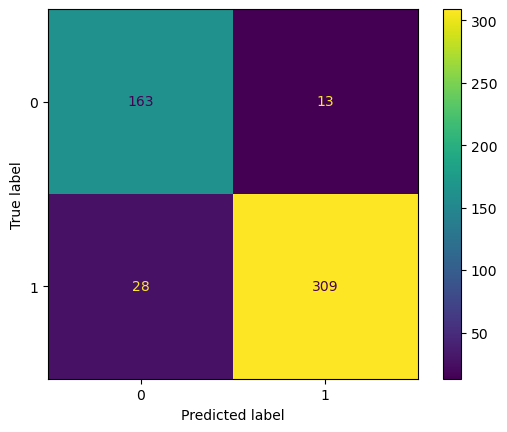

In [52]:
CF_matrix_display = ConfusionMatrixDisplay(confusion_matrix=CF_matrix, display_labels=model_.classes_)
CF_matrix_display.plot()

the class label consist of Benign tumors whcich are noncancerous represented as 0 , and Malignant tumors are cancerous represented as 1

 scenario one:  model says non cancerous but labels as cancerious which is FP
 scenario  two : model says cancerous but labels as non cancerous which is FN
so in this case FN is of great importance than FP hence we use recal to measure accuracy 
we the cost of having people with cancer classified as non cancer outweight the other and vice versa 
in other words 25 patients were classified as non cancerous when the had cancer .....

In [53]:
304/(304+25)

0.9240121580547113

In [54]:
304/(304+18)
y_pred


array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [55]:
y_scoress = model_.decision_function(x_fld_train) #decision fuction provide a sore that tells u if the predictor variable lies in zero or not zero.
#or rather decision function provided the probability equivalence of the target binary classification. if value will fall on zero the prob equivalence will be -4 or any negative value 
#if value will fall in 1 the equivalent probality mwill be 1.23 or any positive value depending on our model.
print
y_scoress

cloned = clone(model_)


In [62]:
threshold = 0
y_digit_pred = (y_scoress>0)
y_digit_pred

c = cross_val_score(cloned , x_fld_train, y_fild_train, cv=10, scoring ="accuracy")

y_scores = cross_val_predict(cloned,x_fld_train, y_fild_train, cv=10,  method="decision_function") #prob equiv of y wrt to X(after fitting)
y_scores

C:\anacondaa\envs\Nneoma\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anacondaa\envs\Nneoma\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([-4.23392881e+00, -7.61582027e+00, -7.67542544e+00,  1.26728030e+00,
       -8.30767230e+00,  2.14316286e+00, -4.76971606e+00,  4.85299953e-01,
       -8.62711097e-02, -1.87849896e-01, -1.30917055e+00, -1.16059109e+00,
       -9.65205021e+00, -2.24387320e+00, -1.32159947e+00, -2.36466690e+00,
        4.05485229e-02, -2.70362753e+00, -8.83684961e+00,  2.65620316e+00,
        2.39492001e+00,  5.24631075e+00,  2.01722923e-01, -4.79668335e+00,
       -3.03832172e+00, -5.02047161e+00, -2.93526271e+00, -3.96790073e+00,
       -4.62048733e+00, -1.90063645e+00, -7.63985846e+00,  2.80481932e+00,
       -5.17470255e+00, -7.53675360e+00, -2.67300925e+00, -3.54097191e+00,
       -1.00186859e+00,  2.83612077e+00, -4.22768114e-01,  1.55193454e-01,
        1.71350079e+00,  3.32775824e+00, -8.92982310e+00,  8.17406014e-01,
        1.29002883e+00, -5.47215153e+00,  4.34703416e+00,  1.57866667e+00,
        3.37666141e+00,  1.12058817e+00,  2.65766707e+00,  2.63459962e+00,
        3.46617113e+00, -

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  4.,  2.,  5.,  7., 13.,
        10., 13., 12., 20., 18., 20., 22., 22., 32., 28., 51., 70., 55.,
        42., 28., 17.,  9.,  3.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([-30.05396842, -29.17562887, -28.29728933, -27.41894979,
        -26.54061025, -25.66227071, -24.78393117, -23.90559163,
        -23.02725209, -22.14891255, -21.27057301, -20.39223347,
        -19.51389392, -18.63555438, -17.75721484, -16.8788753 ,
        -16.00053576, -15.12219622, -14.24385668, -13.36551714,
        -12.4871776 , -11.60883806, -10.73049851,  -9.85215897,
         -8.97381943,  -8.09547989,  -7.21714035,  -6.33880081,
         -5.46046127,  -4.58212173,  -3.70378219,  -2.82544265,
         -1.94710311,  -1.06876356,  -0.19042402,   0.68791552,
          1.56625506,   2.4445946 ,   3.32293414,   4.20127368,
          5.07961322,   5.95795276,   6.8362923 ,   7.71463185,
          8.

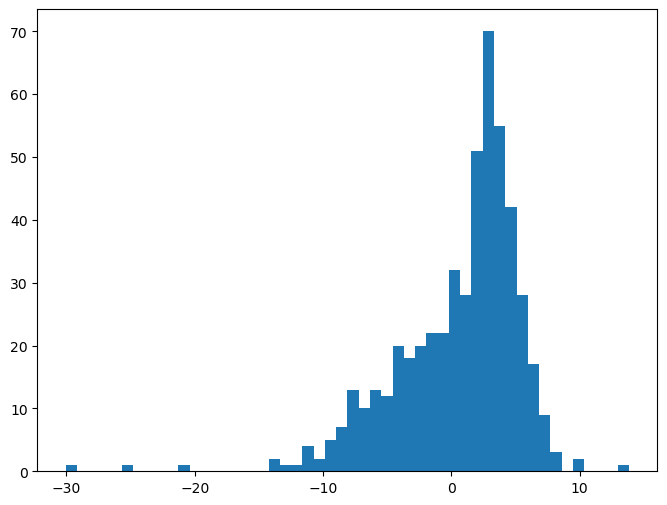

In [66]:
plt.figure(figsize=(8,6))
plt.hist(y_scores, bins=50)

#from this we can deduce that our model or classifier predicted that majority of patience are prone to have cancer and less pateince are prone to have cancer as our
* recall_precision trade off and graph

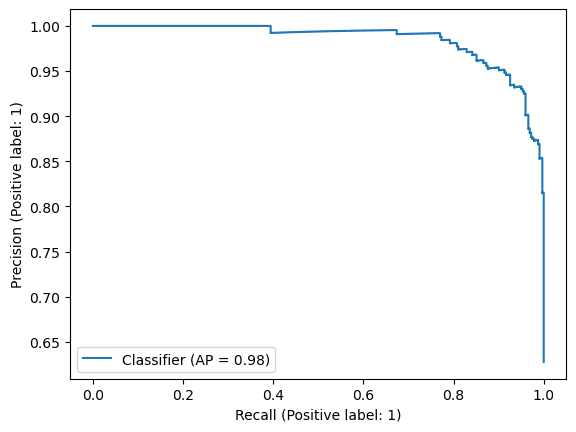

In [78]:
precision, recall, thresholds = precision_recall_curve(y_fild_train, y_scores) #
recall
display = PrecisionRecallDisplay.from_predictions(y_fild_train, y_scores)